This page briefly goes over the regression metrics found in scikit-learn. The metrics are first calculated with NumPy and then calculated using the higher level functions available in sklearn.metrics.

### 1. Generate data and fit with linear model

<ipython-input-1-76ae7735d319>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


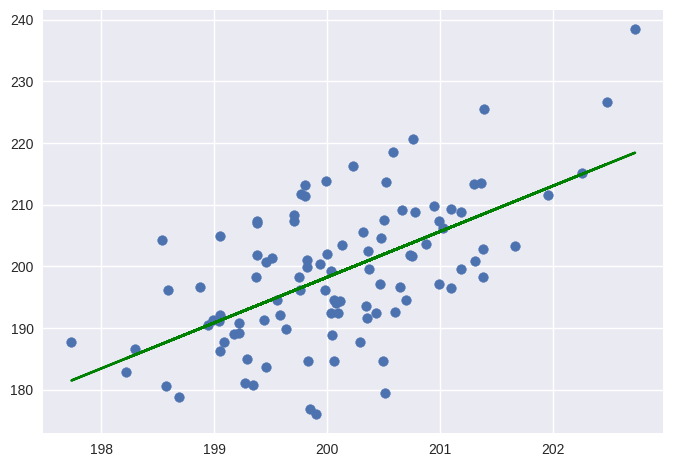

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

#Generate data
regression_data, regression_values = make_regression(n_samples=100,n_features=1,n_informative=1,noise=10)

#Set X, y_true (and shift to quadrant 1)
X = regression_data[:,0].reshape(100,1)+200
y_true = regression_values.reshape(100,1)+200

##Fit data
lr_model = LinearRegression()
lr_model.fit(X,y_true)

#Make predictions
y_pred = lr_model.predict(X)

#Plot Data
plt.style.use('seaborn')
plt.scatter(X,y_true)
plt.plot(X,y_pred,'g-');

## 2. Regression Metrics

In [2]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, median_absolute_error,explained_variance_score,r2_score
import numpy as np

#### Mean Squared Error
This metric is a component of one of the most popular regression metrics (Root Mean Squared Error). It penalizes outliers due to its squared component. It is calculated as the average of the squares of the difference between the predicted and true values of y.

In [3]:
MSE = np.mean((y_true-y_pred)**2)

#or use sklearn
MSE_sklearn = mean_squared_error(y_true,y_pred)

if MSE==MSE_sklearn:
    print("Mean squared error: {}".format(MSE))

Mean squared error: 85.19088792539775


#### Root Mean Squared Error

RMSE (Root mean squared error) is commonly used as an evaluation metric in regression problems. It is calculated by taking the square root of Mean Squared Error. Conveniently, the RMSE as the same units as the quantity estimated (y).


In [4]:
RMSE = np.sqrt(MSE)

#no sklearn function available as of v0.19.0

print("Root mean squared error: {}".format(RMSE))

Root mean squared error: 9.2298910028991


#### R^2 Score

Also know as the coefficient of determination. It gives some idea of the "goodness of fit" of the model. It calculates the proportion of variance which is explained by the model. Ranges from 0 to 1 where perfect explanation is denoted with a 1.

In [5]:
residuals_sum_of_squares = np.sum((y_true-y_pred)**2)
total_sum_of_squares = np.sum((y_true-np.mean(y_true))**2)

r2 = 1-residuals_sum_of_squares/total_sum_of_squares

#Sklearn convenience method
r2_sklearn = r2_score(y_true,y_pred)

if r2 == r2_sklearn:
    print("R^2 Score: {}".format(r2))

R^2 Score: 0.356434570417547


#### Explained Variance Score

Similar to R^2 Score.

In [8]:
y_error = y_true-y_pred
numerator = np.sum((y_error-np.mean(y_error))**2)

explained_var = 1-numerator/total_sum_of_squares

#sklearn convenience method
explained_var_sklearn=explained_variance_score(y_true,y_pred)

#if explained_var == explained_var_sklearn:
print("Explained variance score: {}".format(explained_var))

Explained variance score: 0.3564345704175468


#### Mean Absolute Error

A metric which is sensitive to outliers due to the fact that it is a mean. It is calculated by taking the mean value of the absolute differences between the predicted and true values of y. One advantage is that it is easily interpretable. Conveniently, its units are the same as y's.

In [9]:
MAE = np.mean(np.abs(y_true-y_pred))

#or use sklearn
MAE_sklearn = mean_absolute_error(y_true,y_pred)

if MAE==MAE_sklearn:
    print("MAE: {}".format(MAE))

MAE: 7.369796777014574


#### Median Absolute Error

Similar to Mean Absolute Error but it is robust to outliers (due to its reliance on the median). It is calculated as the median of the absolute differences between the predicted and true values of y. Like MSE, its units are conveniently the same as y's.

In [10]:
MedAE = np.median(np.abs(y_true-y_pred))

#or use sklearn
MedAE_sklearn = median_absolute_error(y_true,y_pred)

if MedAE==MedAE_sklearn:
    print("MedAE: {}".format(MedAE))

MedAE: 6.129076857893722


#### Mean Squared Log Error
This metric penalizes errors in proportion with the size of y (even small errors are penalzied for small values of y, but small errors are not penalized for large values of y).

In [12]:
MSLE = np.mean((np.log(y_true+1)-np.log(y_pred+1))**2)

#or use sklearn
MSLE_sklearn = mean_squared_log_error(y_true,y_pred)

#if MSLE==MSLE_sklearn:
print("Mean squared log error: {}".format(MSLE))

Mean squared log error: 0.002130128436401007
